In [ ]:
### 마케팅 시작날짜와 판매일 --> 비스니스 사이클 나올지 확인

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt

In [3]:
# 한글 쓰는 방법
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Apple SD Gothic Neo


/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_62974/206075750.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [4]:
import os
# 현재 working directory 확인 방법
print(os.getcwd()) # 주피터에서
#pwd # 터미널에서 
# 데이터 있는 경로 확인
path = "/Users/jungtaekchoi/Google Drive/My Drive/fastcamp/datas"
# 경로 바꾸는 방법
os.chdir(path)
# 리스트 목록 확인
!ls

/Users/jungtaekchoi/Desktop/fastcamp/2. 데이터 전처리를 위한 라이브러리
Fastcampus_data_after_cleaning.csv
country.csv
sakila-data.sql
sakila-schema.sql
world.sql
수업.sql
수업2-2.sql
수업2.sql
데이터분석프로젝트_VER2_210329_210926.xlsx


In [5]:
df = pd.read_csv(path + "/Fastcampus_data_after_cleaning.csv")

In [6]:
t_df = df[~df["marketing_start_at"].isnull()]

In [7]:
t_df['completed_at'] = pd.to_datetime(t_df['completed_at'], yearfirst=True)
t_df['marketing_start_at'] = pd.to_datetime(t_df['marketing_start_at'], yearfirst=True)

/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_62974/262416083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['completed_at'] = pd.to_datetime(t_df['completed_at'], yearfirst=True)
/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_62974/262416083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['marketing_start_at'] = pd.to_datetime(t_df['marketing_start_at'], yearfirst=True)


In [8]:
t_df["when"] = (t_df['completed_at'] - t_df['marketing_start_at']).astype('timedelta64[D]').astype('int')

/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_62974/2190307256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df["when"] = (t_df['completed_at'] - t_df['marketing_start_at']).astype('timedelta64[D]').astype('int')


In [30]:
tt_df = t_df[(t_df.type == "PAYMENT") & (t_df.state == "COMPLETED")]

In [31]:
tt_df.sort_values(by = ["when"])

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,when
25815,25822,1047501,501358.0,PAYMENT,COMPLETED,이안 굿펠로의 딥러닝 온라인 완독반 1기,데이터사이언스,온라인 완주반,2021-05-01 17:36:12,189000,[웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰,21000.0,210000.0,INICIS,VBANK,없음,2021-05-06 18:00:00,-6
24992,24999,1045459,63334.0,PAYMENT,COMPLETED,이안 굿펠로의 딥러닝 온라인 완독반 1기,데이터사이언스,온라인 완주반,2021-04-30 22:08:17,210000,없음,0.0,210000.0,INICIS,CARD,없음,2021-05-06 18:00:00,-6
79782,79802,1242775,570092.0,PAYMENT,COMPLETED,Apache Spark을 이용한 빅데이터 분석 입문 15기,데이터사이언스,캠프,2021-07-26 11:27:39,1296000,[추가 10% 할인] Apache Spark을 이용한 빅데이터 분석 입문 15기,144000.0,1440000.0,INICIS,CARD,데이터분석,2021-07-30 00:00:00,-4
14123,14130,1013479,162115.0,PAYMENT,COMPLETED,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱 플러스,마케팅,올인원,2021-04-16 15:51:53,310000,[럭키룰렛] 올인원패키지,20000.0,330000.0,INICIS,CARD,글쓰기/카피라이팅,2021-04-16 17:00:00,-1
14104,14111,1013407,11658.0,PAYMENT,COMPLETED,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱 플러스,마케팅,올인원,2021-04-16 15:24:19,330000,없음,0.0,330000.0,INICIS,CARD,글쓰기/카피라이팅,2021-04-16 17:00:00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104218,104240,1357451,642373.0,PAYMENT,COMPLETED,올인원 패키지 : 스타트업 투자유치&벤처 투자,부동산/금융,올인원,2021-09-21 17:48:01,119000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,139000.0,PAYCO,CARD,금융/투자 실무,2019-02-20 00:00:00,944
104234,104256,1357562,667819.0,PAYMENT,COMPLETED,올인원 패키지 : 스타트업 투자유치&벤처 투자,부동산/금융,올인원,2021-09-21 19:16:00,129000,[미래투자금] 온라인 강의 1만원 할인쿠폰,10000.0,139000.0,INICIS,CARD,금융/투자 실무,2019-02-20 00:00:00,944
104444,104467,1359020,284553.0,PAYMENT,COMPLETED,올인원 패키지 : 스타트업 투자유치&벤처 투자,부동산/금융,올인원,2021-09-22 18:23:57,139000,없음,0.0,139000.0,NAVER,CARD,금융/투자 실무,2019-02-20 00:00:00,945
104904,104927,1361583,64294.0,PAYMENT,COMPLETED,올인원 패키지 : 스타트업 투자유치&벤처 투자,부동산/금융,올인원,2021-09-23 18:31:30,139000,없음,0.0,139000.0,INICIS,VBANK,금융/투자 실무,2019-02-20 00:00:00,946


In [26]:
### 히스토그램 그려보기..!
### 마케팅 시작날짜와 판매일 --> 비스니스 사이클 나올지 확인

<AxesSubplot:ylabel='Frequency'>

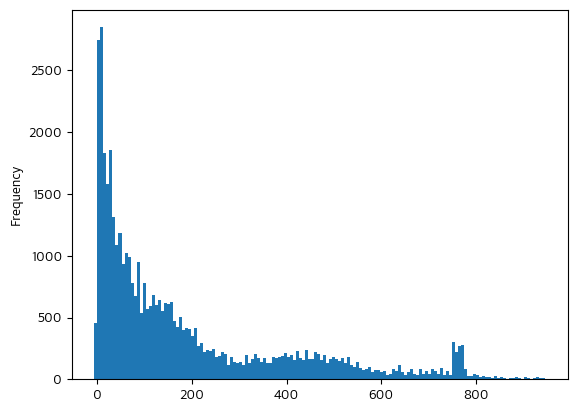

In [36]:
tt_df["when"].plot.hist(bins = 150)

In [ ]:
## 모델링의 문제 정의, 가설 설정 정도까지 하면 스토리텔링 완성!